In [1]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import json

预处理类，返回一个数组和一个字典。
数组中包含所有标注实体的长度值
字典的key是实体类型，value是出现次数

In [2]:
class pre_process:
    @staticmethod
    def read_json(file_path):
        with open(file_path, encoding='utf-8') as f:
            raw_examples = json.load(f)
        return raw_examples

    def get_len_type_count(self, raw_examples):
        len_count = []
        type_count = collections.defaultdict()

        for i, item in enumerate(raw_examples):
            labels = item['labels']
            for label in labels:
                type = label[1]
                if (type in type_count):
                    type_count[type] += 1
                else:
                    type_count[type] = 1
                diff = (int)(label[3] - label[2])
                len_count.append(diff)
        
        return len_count, type_count

文本长度直方图

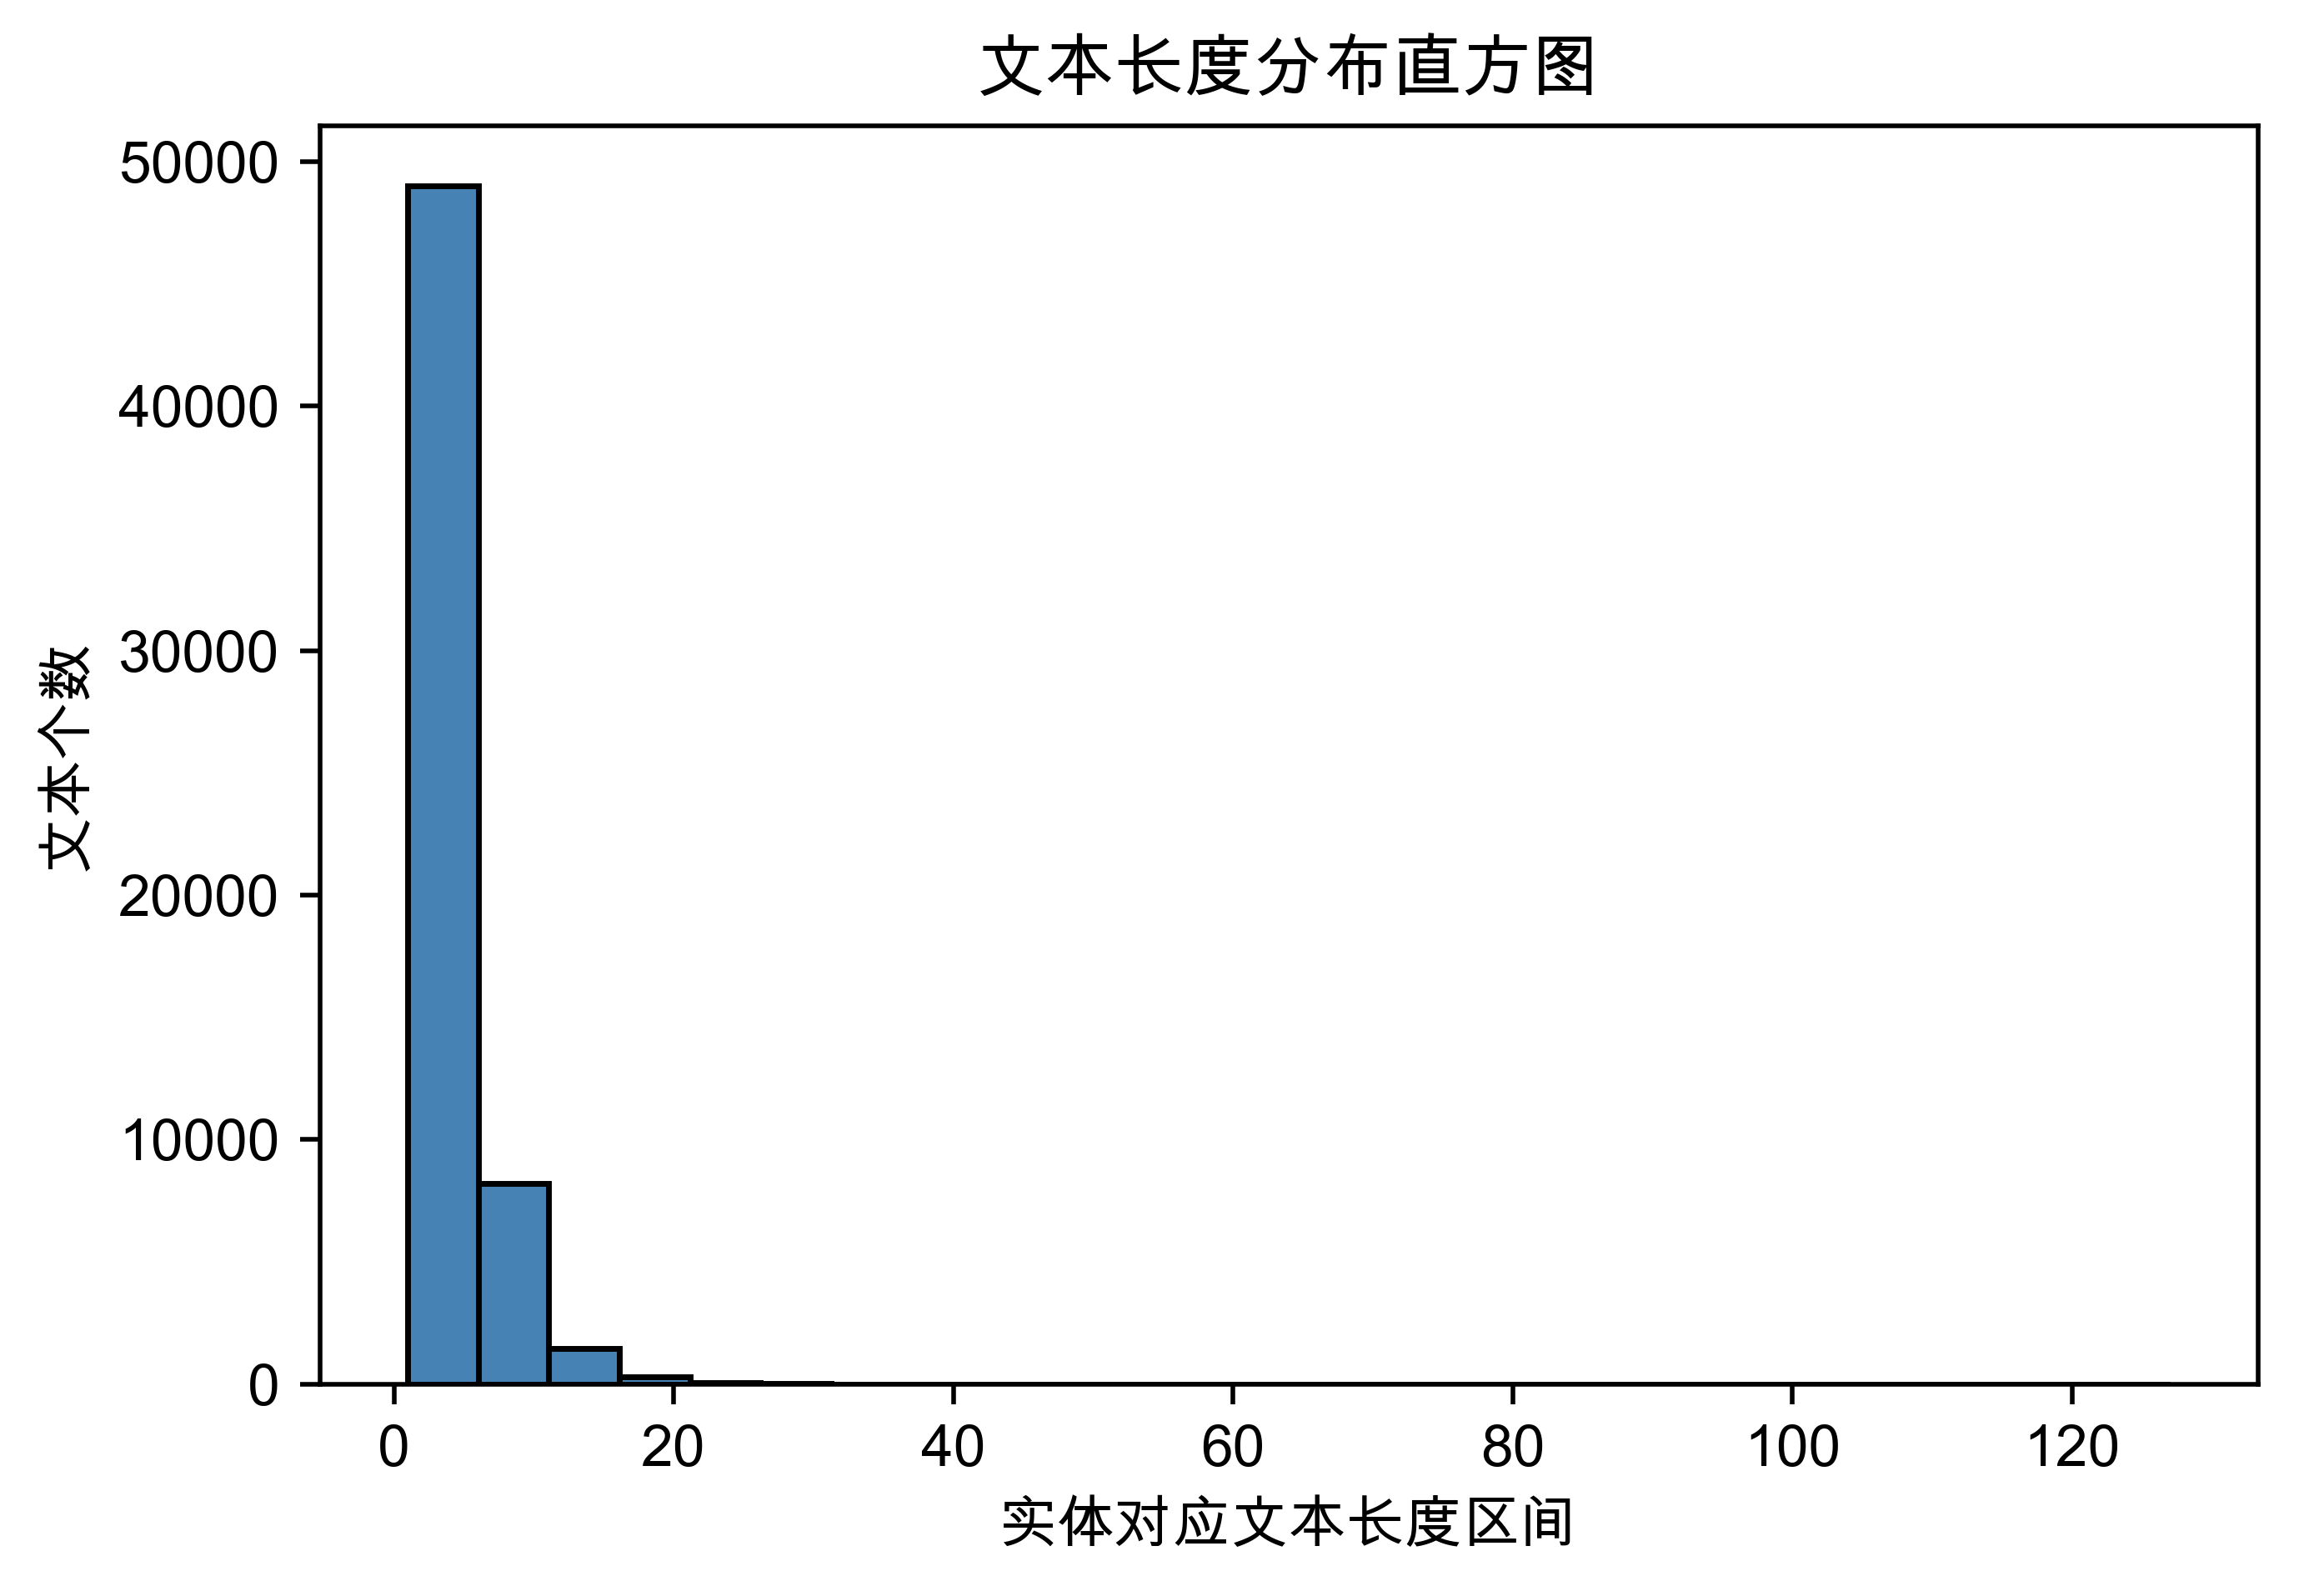

In [18]:
pp = pre_process()
raw_examples = pp.read_json('../raw_data/stack.json')
len_count, type_count = pp.get_len_type_count(raw_examples)
d = 5 ##组距
num_bins = (max(len_count) - min(len_count)) // d #组数

plt.hist(x = len_count, # 指定绘图数据
          bins = num_bins, # 指定直方图中条块的个数
          color = 'steelblue', # 指定直方图的填充色
          edgecolor = 'black' # 指定直方图的边框色
          )
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.xlabel(u'实体对应文本长度区间')
plt.ylabel(u'文本个数')
plt.title(u'文本长度分布直方图')
plt.rcParams['savefig.dpi'] = 500 #图片像素
plt.rcParams['figure.dpi'] = 500 #分辨率
plt.show()

In [ ]:
pp = pre_process()
raw_examples = pp.read_json('../raw_data/stack.json')
len(raw_examples)

不同标签样本数

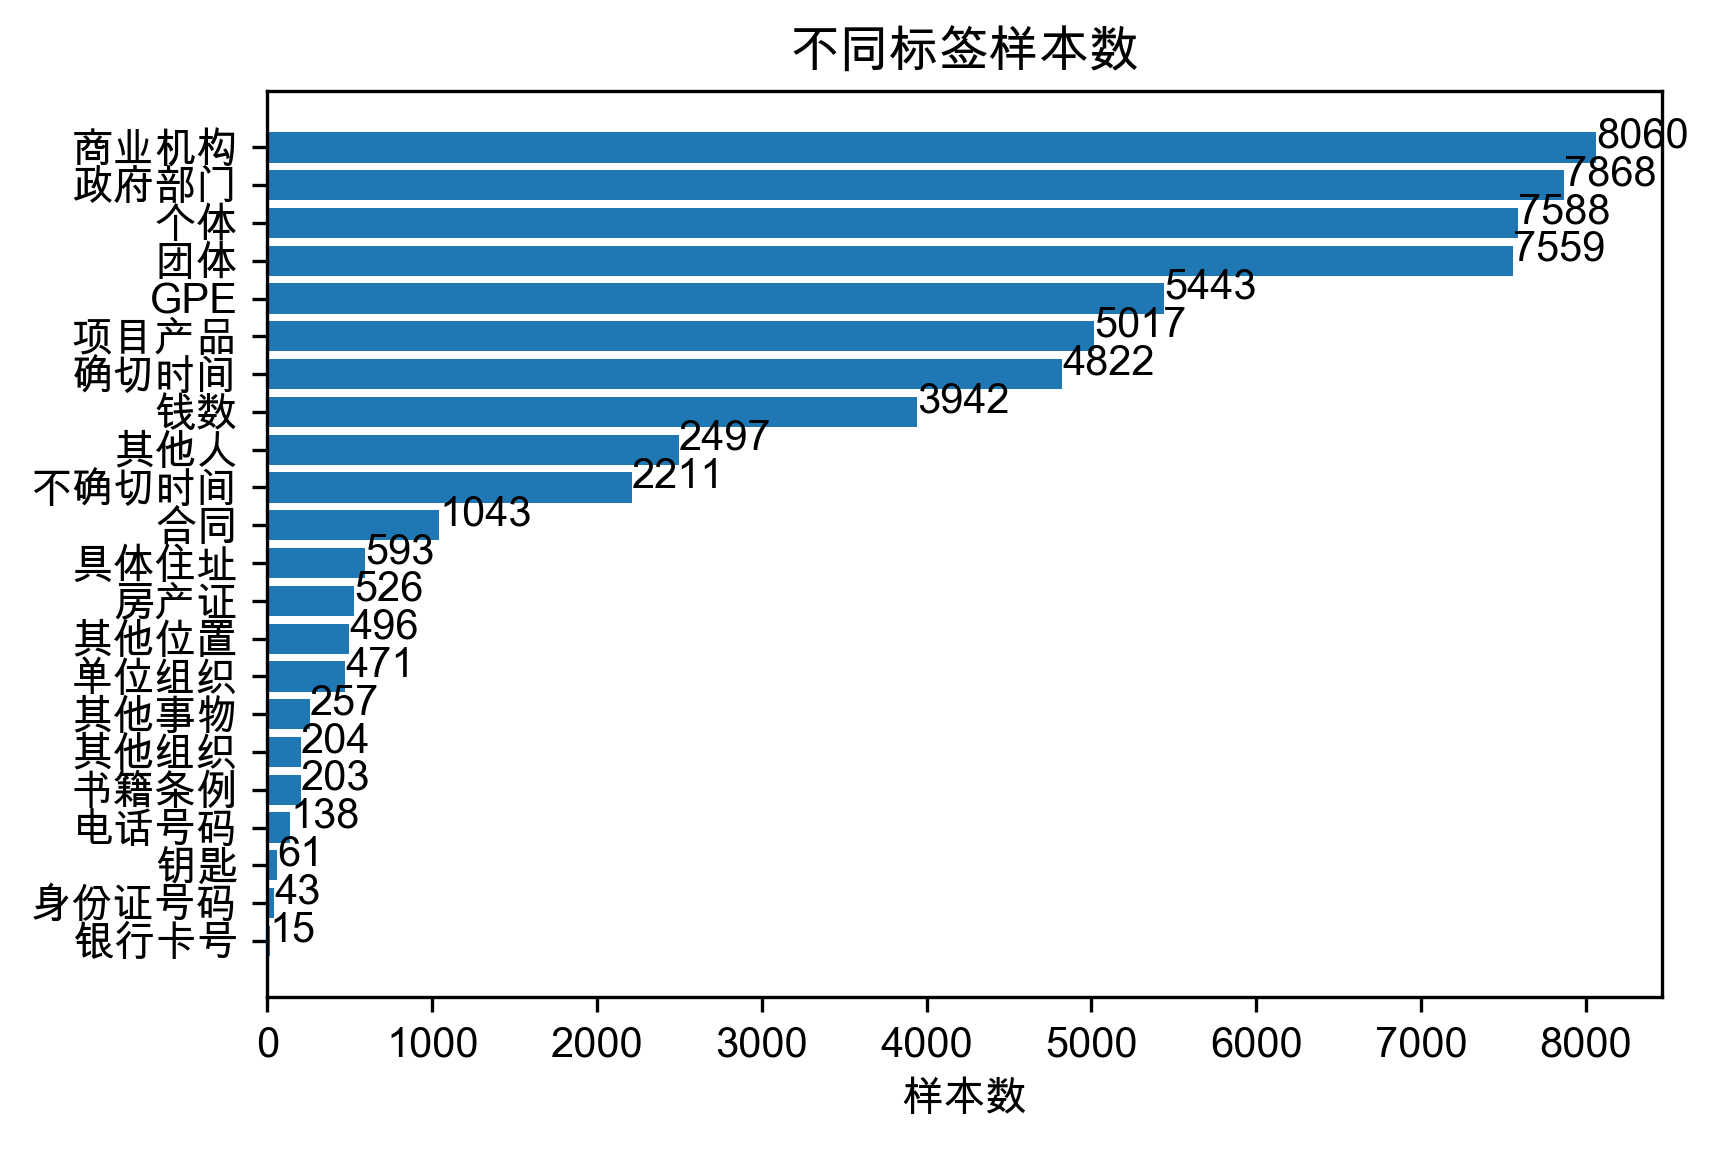

In [17]:
type_count_s = sorted(type_count.items(),key = lambda item:item[1])
labels = []
counts = []
for label, count in type_count_s:
    labels.append(label)
    counts.append(count)
plt.barh(labels, counts)
for a,b in zip(counts,labels):  
 plt.text(a+0.05, b, '%.0f' % a, fontsize=10)  
plt.xlabel("样本数") 
plt.title("不同标签样本数")
plt.rcParams['savefig.dpi'] = 500 #图片像素
plt.rcParams['figure.dpi'] = 500 #分辨率
plt.show() 
